In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [138]:
#We take a look at the MAPE
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [151]:
def Sarimax(region,jour):
    finaldf = pd.read_csv('data centrale/train/{}.csv'.format(region),header=0, index_col=0, parse_dates=True, squeeze=True)   
    endog=finaldf['Consommation']
    endog2=np.asarray(finaldf['Consommation'])
    year=365*48
    week=7*48
    for i in range(jour):
        training_obs = 30672
        training_endog = endog[training_obs-year-week+10*i:training_obs-year+10*i]
        training_mod = sm.tsa.SARIMAX(
        training_endog, order=(27,0,27),seasonal=(27, 0, 27, 48*7*4), trend='c')
        training_res = training_mod.fit()
        fcast = training_res.forecast(steps=48)
        endog=pd.concat([endog,fcast],join='inner')
    return endog[30672:]


    



In [152]:
def SarimaxTvsP(region,jour):
    test = pd.read_csv('data centrale/test/{}.csv'.format(region),header=0, index_col=0, parse_dates=True, squeeze=True)
    pred=Sarimax(region,jour)
    true_data=test['Consommation']
    prediction=[]
    true=[]
    for i in range(len(pred)):
        prediction.append(pred[i])
        true.append(true_data[i])
    mape=mean_absolute_percentage_error(true,prediction)
    plt.plot(prediction,label='prediction')
    plt.plot(true,label='True')
    plt.xticks([48*x for x in range(jour+1)], range(jour+1))
    plt.title("SARIMAX: Prediction vs True en {} avec un MAPE de {}".format(region,mape))
    plt.xlabel("Day")
    plt.ylabel("Consumption(MW)")
    plt.legend()
    plt.show()


/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


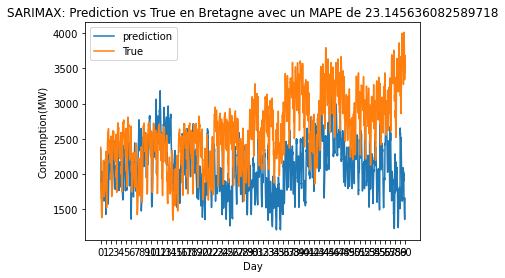

In [153]:
SarimaxTvsP('Bretagne',60)

/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/enguerrandvoisine/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


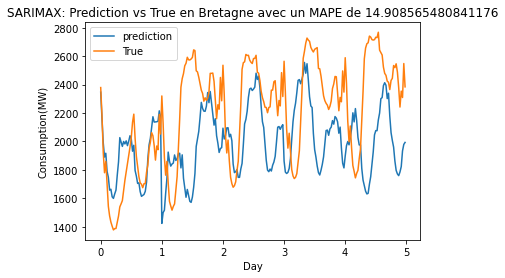

In [154]:
SarimaxTvsP('Bretagne',5)